<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Sign_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import matplotlib.pyplot as plt
import seaborn as sns
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

In [2]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)


#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)

training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (27455,)
# (7172, 28, 28, 1)
# (7172,)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


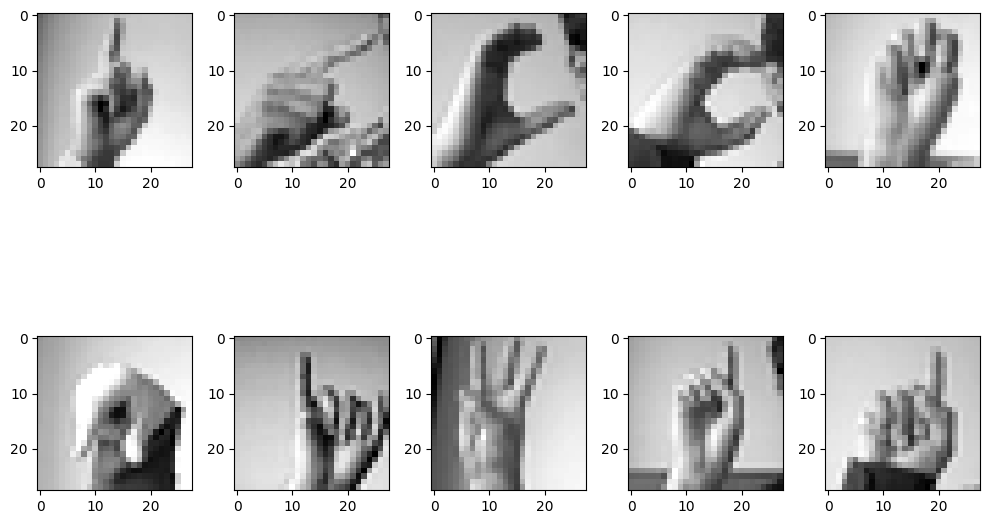

In [6]:
# Plotting the first 10 images
fig, ax = plt.subplots(2,5)
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [7]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
# replace model.fit_generator with model.fit
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) // 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) // 32)



model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.1142 - loss: 2.9385 - val_accuracy: 0.4196 - val_loss: 1.6624
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.2812 - loss: 2.4229

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2812 - loss: 2.4229 - val_accuracy: 0.4085 - val_loss: 1.6983
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.3871 - loss: 1.9176 - val_accuracy: 0.6318 - val_loss: 1.0679
Epoch 4/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4688 - loss: 1.7083 - val_accuracy: 0.6045 - val_loss: 1.1512
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.5071 - loss: 1.4951 - val_accuracy: 0.6945 - val_loss: 0.8251
Epoch 6/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 1.3094 - val_accuracy: 0.6710 - val_loss: 0.8764
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.5969 - loss: 1.2243 - val_accuracy: 0.7856 - val_loss: 0.6135
Epoch 8/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 1.1404 - val_accuracy: 0.7845 - val_loss: 0.6167
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.6528 - loss: 1.0426 - val_accuracy: 0.853

[113.1572265625, 0.6649470329284668]

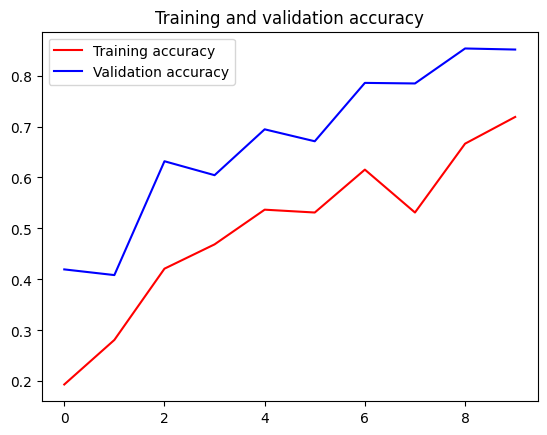

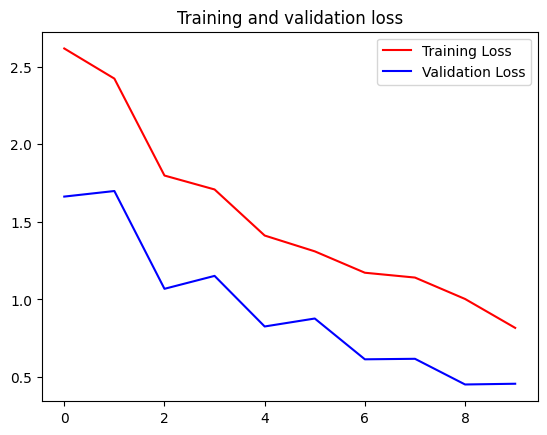

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

     Class 0       0.77      0.79      0.78       331
     Class 1       0.98      0.70      0.82       432
     Class 2       0.84      0.88      0.86       310
     Class 3       0.69      0.87      0.77       245
     Class 4       0.76      0.67      0.71       498
     Class 5       0.81      0.99      0.89       247
     Class 6       0.43      0.26      0.33       348
     Class 7       1.00      0.15      0.27       436
     Class 8       0.68      0.70      0.69       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.05      0.07      0.06       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.01      0.01      0.01       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

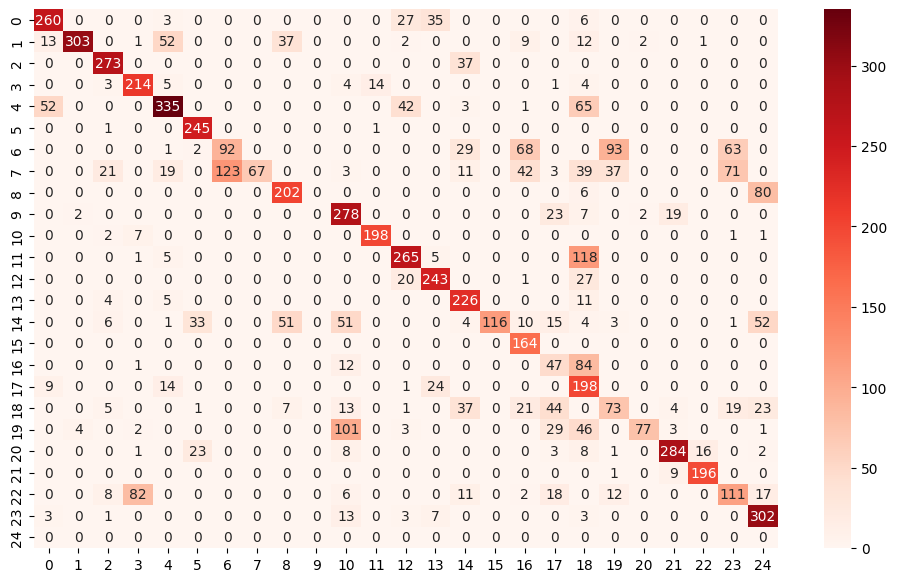

In [13]:
# Predictions
predictions = np.argmax(model.predict(testing_images), axis=-1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

#Output
#array([ 6,  8, 11, 14, 18])

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')